<a href="https://colab.research.google.com/github/offthetab/ML_homework/blob/main/%D0%9F%D0%A0_2_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Решить задачу регрессии
* Сравнить результаты численного решения с аналитическим

$$ y(x) = x0*w0 + x1*w1 $$

In [ ]:
# результат работы модели -- это скалярное произведение весов w на значения признаков x
def linear_prediction(x, w):
    return w @ x.T

In [ ]:
def loss(x,y,w):
  L = (((w @ x.T) - y) ** 2).mean()
  return L

In [ ]:
#необходимо реализовать численную оптимизацию функции стоиомости (градиентный спуск)
#на вход подается матрица признаков Х, целевая переменная y, веса и скорость обучения lr (параметр альфа)
#функция стоимости -- MSE
def optim(x,w,y,lr=0.001):
    epsilon = 0.00001  # значение для остановки цикла
    epoch = 0
    tolerant = True
    while tolerant:

        y_pred = linear_prediction(x, w)    # предсказание модели с текущими весами
        db = 2 * (y_pred - y).mean()    # изменение высоты
        dw = 2 * ((y_pred - y) * x[:, 1]).mean()    # изменение наклона
        delta_w = np.array([db, dw])

        w = w - lr * delta_w   # новые веса направленные в соторону антиградиента

        if abs(db * lr) < epsilon or abs(dw * lr) < epsilon:    # условие выхода из цикла
            tolerant = False
    return w

In [ ]:
x = [6.1101, 5.5277, 8.5186, 7.0032, 5.8598, 8.3829, 7.4764, 8.5781, 6.4862, 5.0546, 5.7107, 14.164, 5.734, 8.4084, 5.6407, 5.3794,
    6.3654, 5.1301, 6.4296, 7.0708, 6.1891, 20.27, 5.4901, 6.3261, 5.5649, 18.945, 12.828, 10.957, 13.176, 22.203, 5.2524, 6.5894,
    9.2482, 5.8918, 8.2111, 7.9334, 8.0959, 5.6063, 12.836, 6.3534, 5.4069, 6.8825, 11.708, 5.7737, 7.8247, 7.0931, 5.0702, 5.8014,
    11.7, 5.5416, 7.5402, 5.3077, 7.4239, 7.6031, 6.3328, 6.3589, 6.2742, 5.6397, 9.3102, 9.4536, 8.8254, 5.1793, 21.279, 14.908, 18.959,
    7.2182, 8.2951, 10.236, 5.4994, 20.341, 10.136, 7.3345, 6.0062, 7.2259, 5.0269, 6.5479, 7.5386, 5.0365, 10.274, 5.1077, 5.7292, 5.1884,
    6.3557, 9.7687, 6.5159, 8.5172, 9.1802, 6.002, 5.5204, 5.0594, 5.7077, 7.6366, 5.8707, 5.3054, 8.2934, 13.394, 5.4369]
y = [17.592, 9.1302, 13.662, 11.854, 6.8233, 11.886, 4.3483, 12, 6.5987, 3.8166, 3.2522, 15.505, 3.1551, 7.2258, 0.71618, 3.5129, 5.3048, 0.56077,
     3.6518, 5.3893, 3.1386, 21.767, 4.263, 5.1875, 3.0825, 22.638, 13.501, 7.0467, 14.692, 24.147, -1.22, 5.9966, 12.134, 1.8495, 6.5426, 4.5623,
     4.1164, 3.3928, 10.117, 5.4974, 0.55657, 3.9115, 5.3854, 2.4406, 6.7318, 1.0463, 5.1337, 1.844, 8.0043, 1.0179, 6.7504, 1.8396, 4.2885, 4.9981,
     1.4233, -1.4211, 2.4756, 4.6042, 3.9624, 5.4141, 5.1694, -0.74279, 17.929, 12.054, 17.054, 4.8852, 5.7442, 7.7754, 1.0173, 20.992, 6.6799, 4.0259,
     1.2784, 3.3411, -2.6807, 0.29678, 3.8845, 5.7014, 6.7526, 2.0576, 0.47953, 0.20421, 0.67861, 7.5435, 5.3436, 4.2415, 6.7981, 0.92695, 0.152, 2.8214,
     1.8451, 4.2959, 7.2029, 1.9869, 0.14454, 9.0551, 0.61705]

In [ ]:
w_start = np.array([1, 1])  # задаем начальные веса
x_1 = np.column_stack((np.ones(len(x)), x))  # полагаем x0 = 1, x1

In [ ]:
w_optima = optim(np.array(x_1), w_start, np.array(y))
Y_predict = linear_prediction(x_1, w_optima)

print("Optimal weights :", w_optima)
print("MSE :", loss(np.array(x_1), np.array(y), w_optima))
print("Model predictions :", Y_predict)

Optimal weights : [-3.61984981  1.16531338]
MSE : 8.967805861973567
Model predictions : [ 3.50033145  2.82165294  6.30698871  4.54107282  3.20865351  6.14885569
  5.09249911  6.37632486  3.93860581  2.27034318  3.03490528 12.88564884
  3.06205709  6.17857118  2.95333335  2.64883696  3.79783595  2.35832434
  3.87264907  4.61984801  3.5923912  20.00105231  2.77783715  3.75203914
  2.86500259 18.45701208 11.32879017  9.14848884 11.73431922 22.25360306
  2.50084216  4.05886615  7.15720135  3.24594354  5.94865485  5.62504732
  5.81441075  2.91324657 11.33811268  3.78385219  2.68088308  4.4004195
 10.02363919  3.10832003  5.49837776  4.64583449  2.28852207  3.14059921
 10.01431668  2.83785079  5.1668461   2.56528399  5.03132016  5.24014432
  3.75984673  3.79026141  3.69155937  2.95216803  7.22945078  7.39655672
  6.66450685  2.41565776 21.1768535  13.75264199 18.47332647  4.7916152
  6.04654117  8.3082979   2.78867457 20.08378956  8.19176656  4.92714114
  3.37925539  4.80058811  2.238064    

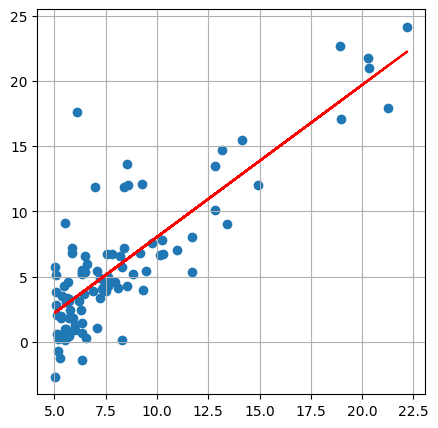

In [ ]:
plt.figure(figsize=(5,5))
plt.grid()
plt.scatter(x,y)
plt.plot(x, Y_predict, c='r')
plt.show()

In [ ]:
#найдем аналитическое решение
from numpy.linalg import inv
x = np.column_stack((np.ones(len(x)), x)) # добавляем единичный столбец тк полагаем x0 = 1
W = inv(x.T @ x) @ x.T @ np.array(y).T
print("Веса аналитического решения", W)
print("MSE аналитического решения :", loss(x, np.array(y), W))

Веса аналитического решения [-3.89578088  1.19303364]
MSE аналитического решения : 8.953942751950358


# Решить задачу регрессии для прогнозирования ...

> Блок с отступами


Использовать линейную регрессию без регуляризации, с регуляризацией Тихонова, и лассо регуляризацией, сравнить результаты

Данные можно скачать двумя способами:

* Скачать данные с Kaggle, в Google Colab нажать слева значок папки и перетащить данные туда
* С помощью Kaggle API

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"pavelgrom123123","key":"b52c160bf247b382702e8555c7286709"}'}

In [ ]:
!rm -r ~/.kaggle
!mkdir ~/.kaggle
!mv ./kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

rm: cannot remove '/root/.kaggle': No such file or directory


In [ ]:
!kaggle datasets download 'shivam2503/diamonds'

  0% 0.00/733k [00:00<?, ?B/s]
100% 733k/733k [00:00<00:00, 118MB/s]


In [ ]:
!unzip diamonds.zip

Archive:  diamonds.zip
  inflating: diamonds.csv            


In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

data = pd.read_csv("diamonds.csv")
print(data.shape)
data.head()

(53940, 11)


,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53920 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53920 non-null  float64
 1   cut      53920 non-null  float64
 2   color    53920 non-null  float64
 3   clarity  53920 non-null  float64
 4   depth    53920 non-null  float64
 5   table    53920 non-null  float64
 6   price    53920 non-null  int64  
 7   x        53920 non-null  float64
 8   y        53920 non-null  float64
 9   z        53920 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 4.5 MB


In [ ]:
data.drop('Unnamed: 0', axis = 1, inplace = True) # удаляем столбец с ID

In [ ]:
data.isna().sum() # проверяем наличие na-значений
# na-значения отсутсвуют

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [ ]:
#Убираем 0 значения размеров, так как алмаз - трехмерный объект
data = data.drop(data[data["x"]==0].index)
data = data.drop(data[data["y"]==0].index)
data = data.drop(data[data["z"]==0].index)

In [ ]:
# выделим категориальные признаки
categorical_cols = data.select_dtypes(include=["object"]).columns.tolist()
print(len(categorical_cols))
categorical_cols

3


['cut', 'color', 'clarity']

In [ ]:
# выделим числовые признаки
numeric_cols = data.select_dtypes(exclude=["object"]).columns.tolist()
print(len(numeric_cols))
numeric_cols

7


['carat', 'depth', 'table', 'price', 'x', 'y', 'z']

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
# производим ординалное кодирование категориальных признаков. Используем орднальное кодирование тк есть шкала

encode = OrdinalEncoder()
data[categorical_cols] = encode.fit_transform(data[categorical_cols])

data.head(20)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2.0,1.0,3.0,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3.0,1.0,2.0,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1.0,1.0,4.0,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3.0,5.0,5.0,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1.0,6.0,3.0,63.3,58.0,335,4.34,4.35,2.75
5,0.24,4.0,6.0,7.0,62.8,57.0,336,3.94,3.96,2.48
6,0.24,4.0,5.0,6.0,62.3,57.0,336,3.95,3.98,2.47
7,0.26,4.0,4.0,2.0,61.9,55.0,337,4.07,4.11,2.53
8,0.22,0.0,1.0,5.0,65.1,61.0,337,3.87,3.78,2.49
9,0.23,4.0,4.0,4.0,59.4,61.0,338,4.00,4.05,2.39


In [ ]:
correlation_matrix = data.corr()

<Axes: >

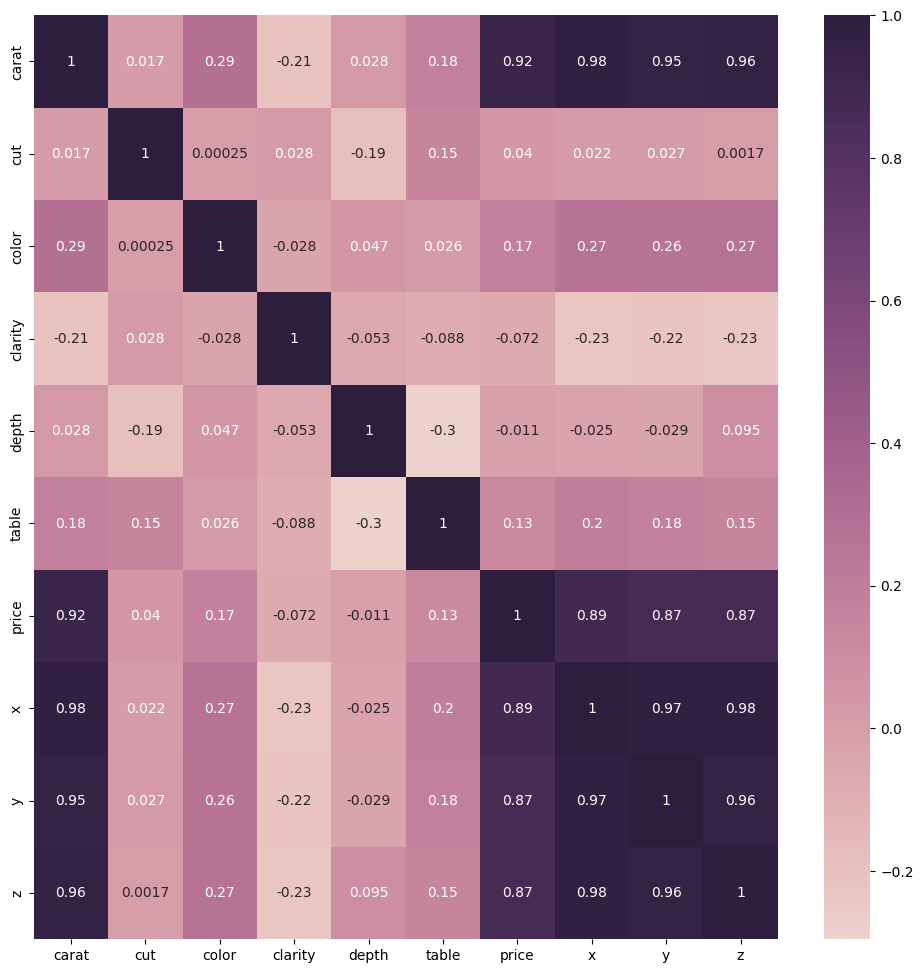

In [ ]:
import seaborn as sns
f, ax = plt.subplots(figsize=(12,12))
sns.heatmap(correlation_matrix,cmap=sns.cubehelix_palette(as_cmap=True),annot=True, )

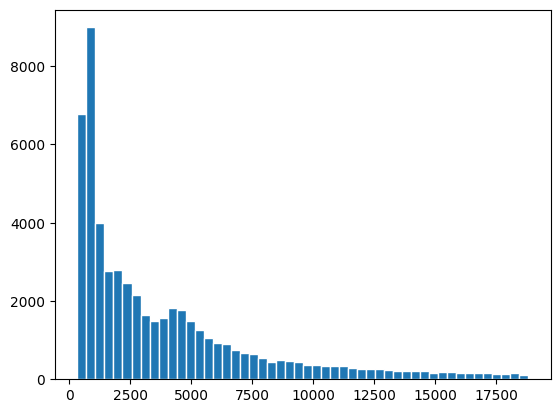

In [ ]:
plt.hist(data['price'], bins = 50, edgecolor='white')
plt.show()

#data['price'].apply(np.log) возможно имеет смысл взять логарифм от цены


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    data.drop('price', axis=1),
    data['price'],
    test_size=0.3,
    random_state=1,
    shuffle=True
)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print()
print(X_test.shape)
print(y_test.shape)

(37744, 9)
(37744,)

(16176, 9)
(16176,)


In [ ]:
# Реализация линейной регрессии без регуляризации

model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
pred_lr = model_lr.predict(X_test) # получение предсказаний на тестовой выборке
mse = mean_squared_error(y_test, pred_lr)
r2 = r2_score(y_test, pred_lr)
mae = mean_absolute_error(y_test, pred_lr)
print("Средняя ошибка прогноза цены автомобиля:", mae)
print("MSE = {}; R2 = {}".format(round(mse, 3), round(r2, 4)))

Средняя ошибка прогноза цены автомобиля: 851.0369834278429
MSE = 1811321.069; R2 = 0.8816


In [ ]:
# Реализация линейной регрессии с L1 регуляризацией ()

model_lasso = Lasso(max_iter=10000)
model_lasso.fit(X_train, y_train)

Lasso(max_iter=10000)

In [ ]:
pred_lr_lasso = model_lasso.predict(X_test) # получение предсказаний на тестовой выборке
mse = mean_squared_error(y_test, pred_lr_lasso)
r2 = r2_score(y_test, pred_lr_lasso)
mae = mean_absolute_error(y_test, pred_lr_lasso)
print("Средняя ошибка прогноза цены автомобиля:", mae)
print("MSE = {}; R2 = {}".format(round(mse, 3), round(r2, 4)))

Средняя ошибка прогноза цены автомобиля: 852.511525692799
MSE = 1762547.257; R2 = 0.8848


In [ ]:
# Реализация линейной регрессии с L2 регуляризацией ()

model_ridge = Ridge()
model_ridge.fit(X_train, y_train)

Ridge()

In [ ]:
pred_lr_ridge = model_ridge.predict(X_test) # получение предсказаний на тестовой выборке
mse = mean_squared_error(y_test, pred_lr_ridge)
r2 = r2_score(y_test, pred_lr_ridge)
mae = mean_absolute_error(y_test, pred_lr_ridge)
print("Средняя ошибка прогноза цены автомобиля:", mae)
print("MSE = {}; R2 = {}".format(round(mse, 3), round(r2, 4)))

Средняя ошибка прогноза цены автомобиля: 851.4728560564924
MSE = 1807850.26; R2 = 0.8819


In [ ]:
# Можно чет придумать визуализацию

